<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/An%C3%A1lise_de_s%C3%A9rie_temporal_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date

import warnings
warnings.filterwarnings('ignore')

Fontes de dados atualizadas:
* https://brasil.io/dataset/covid19/boletim/
* https://ourworldindata.org/coronavirus

In [2]:
df_total = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/COVID-Alura/main/cases-brazil-states.csv')
df_total.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
1,9,2020-02-25,Brazil,TOTAL,TOTAL,0,0,1,1,0,0,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
3,9,2020-02-26,Brazil,TOTAL,TOTAL,0,0,0,1,0,1,0.0,0.00048,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN


In [3]:
df = df_total.query('estado != "TOTAL"')
df['data'] = pd.to_datetime(df_total['data']).dt.date
df.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


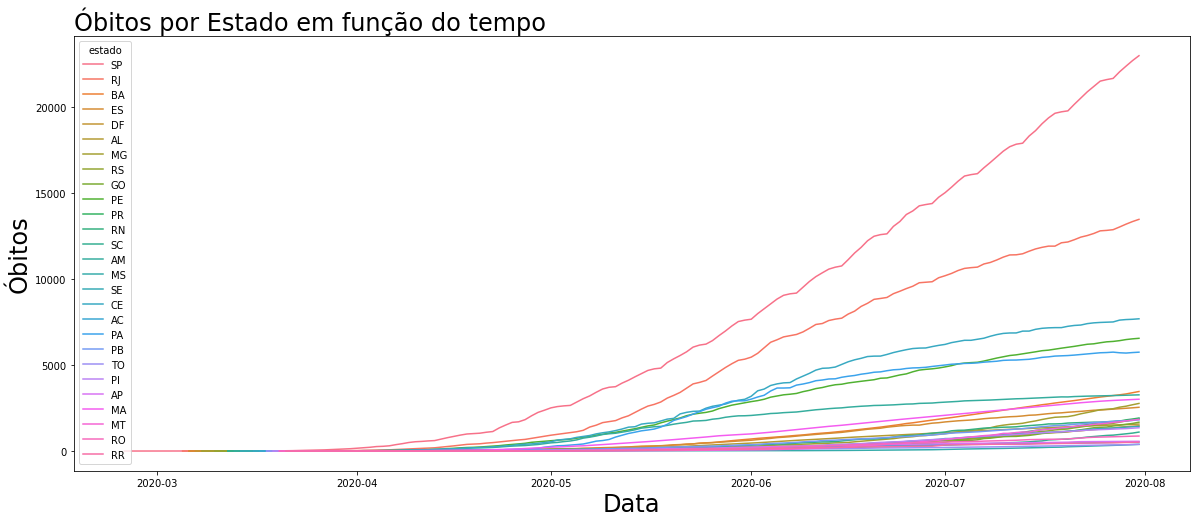

In [4]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(data=df, x='data', y='Obitos', hue='estado')
fig.set_title('Óbitos por Estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Óbitos', fontsize=24);

In [5]:
df_sp = df.query('estado == "SP"')
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


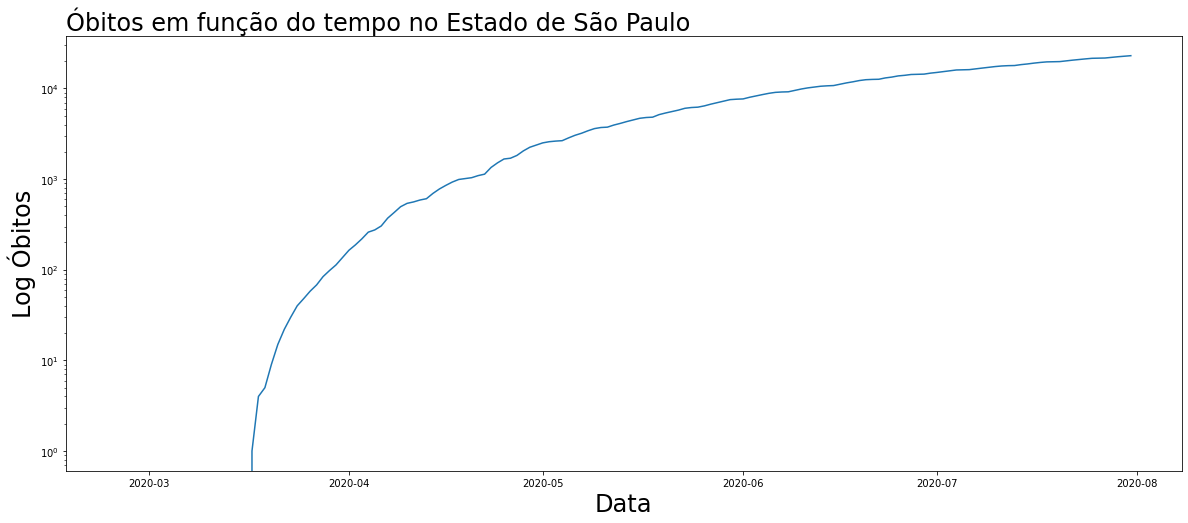

In [6]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(data=df_sp, x='data', y='Obitos')
fig.set_title('Óbitos em função do tempo no Estado de São Paulo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Log Óbitos', fontsize=24)
fig.set_yscale('log');

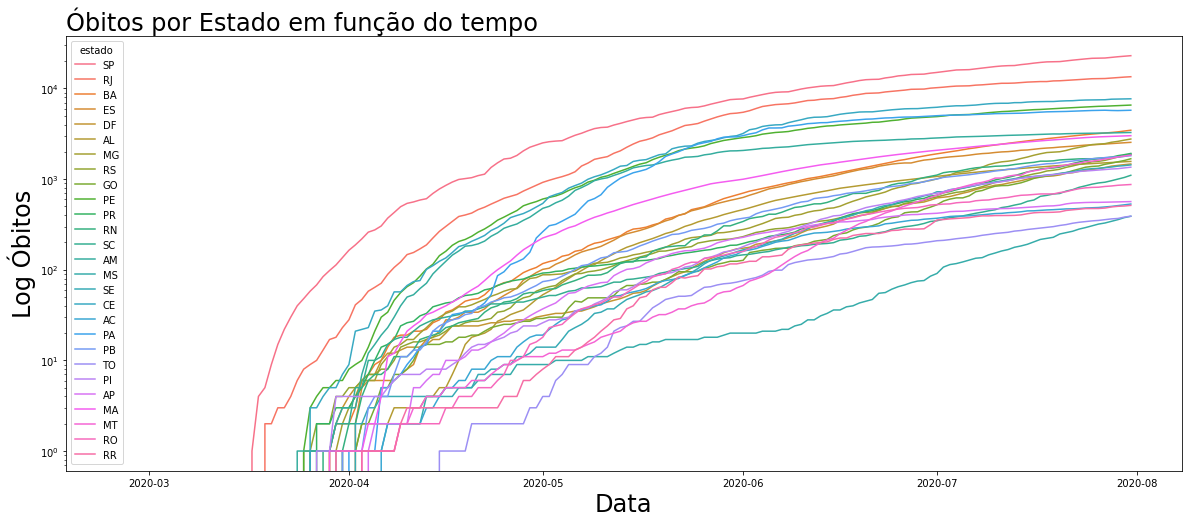

In [7]:
plt.figure(figsize=(20,8))
fig = sns.lineplot(data=df, x='data', y='Obitos', hue='estado')
fig.set_title('Óbitos por Estado em função do tempo', loc='left', fontsize=24)
fig.set_xlabel('Data', fontsize=24)
fig.set_ylabel('Log Óbitos', fontsize=24)
fig.set_yscale('log');

In [8]:
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN


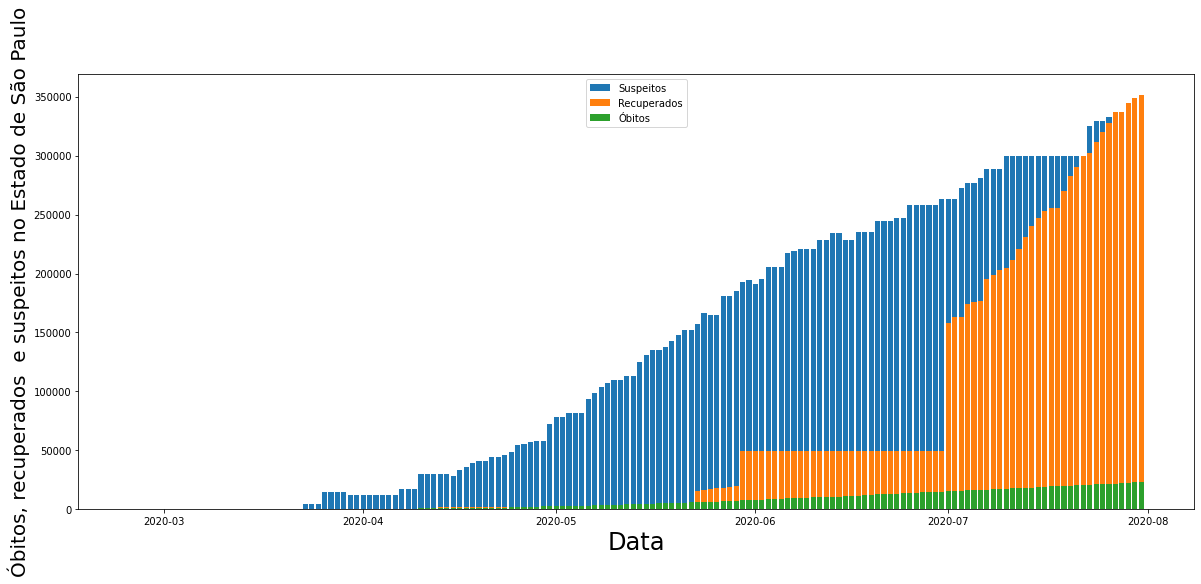

In [9]:
plt.figure(figsize=(20,8))
fig = plt.bar(df_sp.data, df_sp.suspeitos, label='Suspeitos')
plt.bar(df_sp.data, df_sp.recuperados, label='Recuperados')
plt.bar(df_sp.data, df_sp.Obitos, label='Óbitos')
plt.xlabel('Data', fontsize=24)
plt.ylabel('Óbitos, recuperados  e suspeitos no Estado de São Paulo', fontsize=20, rotation=90)
plt.legend();

In [25]:
def plotar_linha(titulo, xlabel, ylabel, x, y, dataset, hue):
    ax = sns.lineplot(x=x, y=y, hue=hue, data=dataset)
    ax.figure.set_size_inches(20,6)
    ax.set_title(titulo, loc='left', fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20, rotation=90);

def plotar_barra(titulo, xlabel, ylabel, x, y, dataset):
    plt.figure(figsize=(20,6))
    ax = plt.bar(dataset[x], dataset[y])
    plt.title(titulo, loc='left', fontsize=20)
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20, rotation=90);

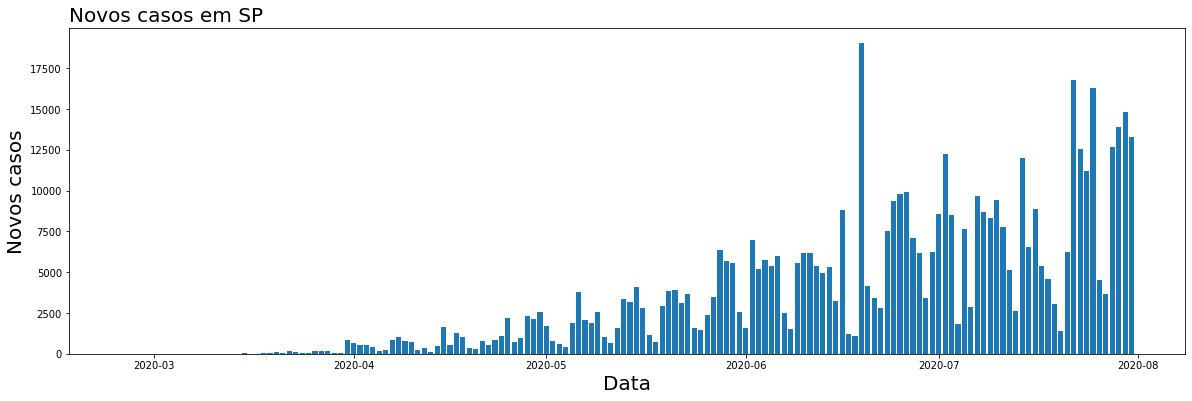

In [15]:
plotar_barra('Novos casos em SP', 'Data', 'Novos casos', 'data', 'novosCasos', df_sp)

In [16]:
df_sp['aceleracaoCasos'] = df_sp.novosCasos.diff()
df_sp['aceleracaoObitos'] = df_sp.novosObitos.diff()
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0


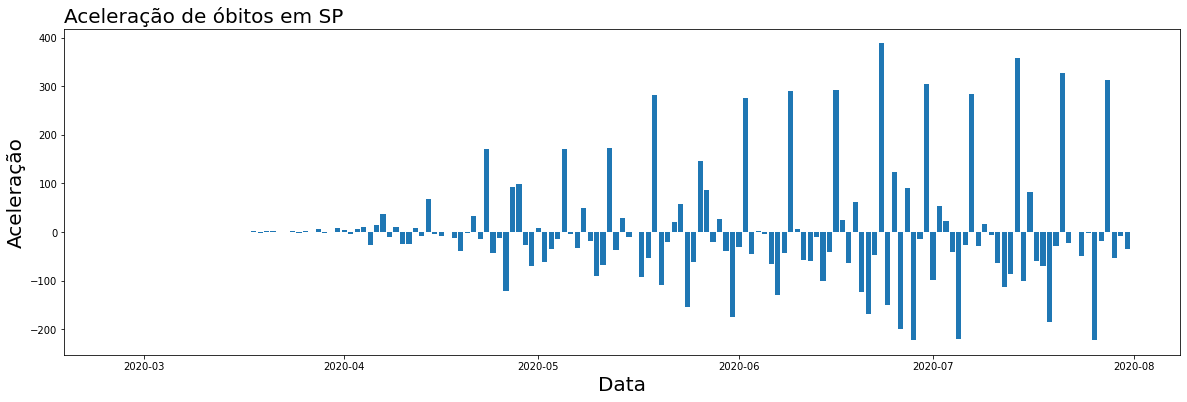

In [17]:
plotar_barra('Aceleração de óbitos em SP', 'Data', 'Aceleração', 'data', 'aceleracaoObitos', df_sp)

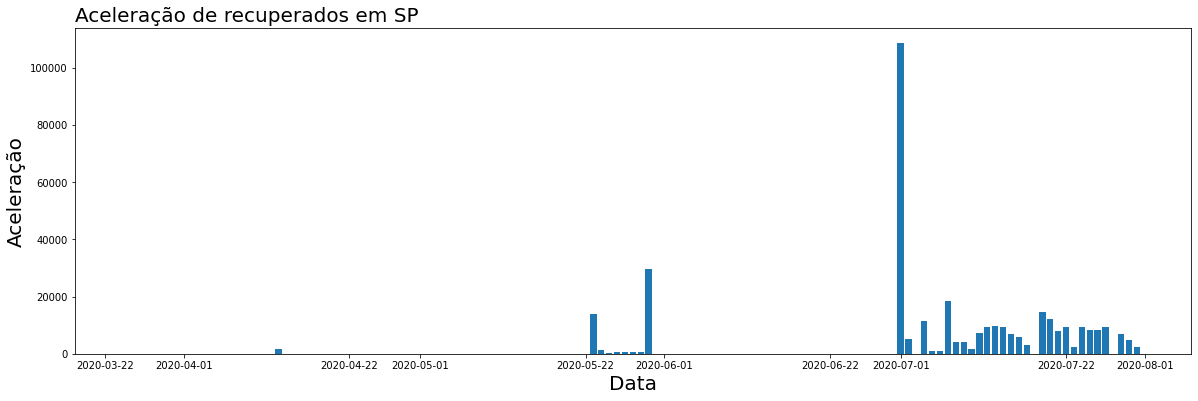

In [18]:
df_sp['aceleracaoRecuperados'] = df_sp['recuperados'].diff()
plotar_barra('Aceleração de recuperados em SP','Data','Aceleração','data','aceleracaoRecuperados',df_sp)

In [20]:
df_sp['mediaObitos'] = df_sp.novosObitos.rolling(window=7, center=False).mean()
df_sp['mediaObitos14'] = df_sp.novosObitos.rolling(window=14, center=False).mean()
df_sp.head(10)

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos14
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN
10,10,2020-03-01,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
12,10,2020-03-02,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
14,10,2020-03-03,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN
16,10,2020-03-04,Brazil,SP,TOTAL,0,0,1,3,0,3,0.0,0.00653,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,0.0,NaN
19,10,2020-03-05,Brazil,SP,TOTAL,0,0,3,6,0,6,0.0,0.01307,0.0,NaN,NaN,NaN,NaN,2.0,0.0,NaN,0.0,NaN


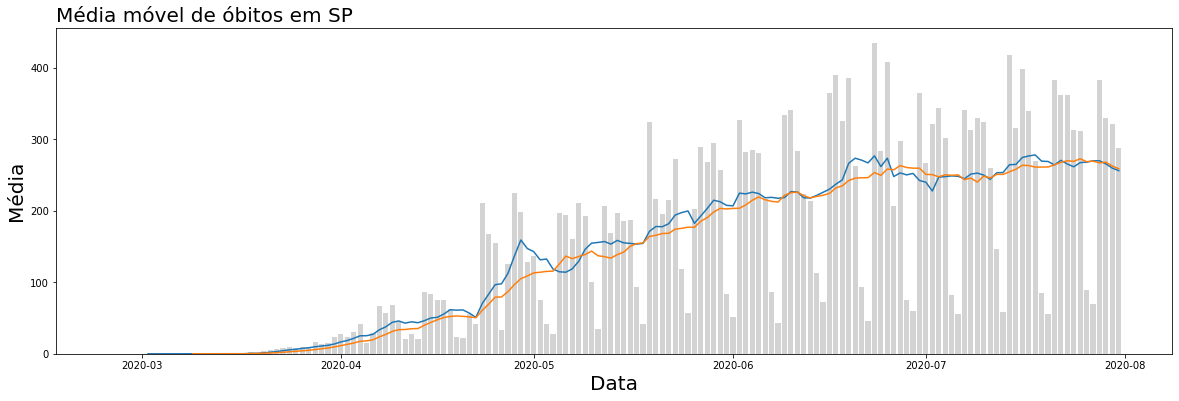

In [26]:
plotar_linha('Média móvel de óbitos em SP', 'Data', 'Média', 'data', 'mediaObitos', df_sp, None)
plotar_linha('Média móvel de óbitos em SP', 'Data', 'Média', 'data', 'mediaObitos14', df_sp, None)
plt.bar(df_sp['data'], df_sp['novosObitos'], color='lightgrey');

In [27]:
from pandas.plotting import autocorrelation_plot

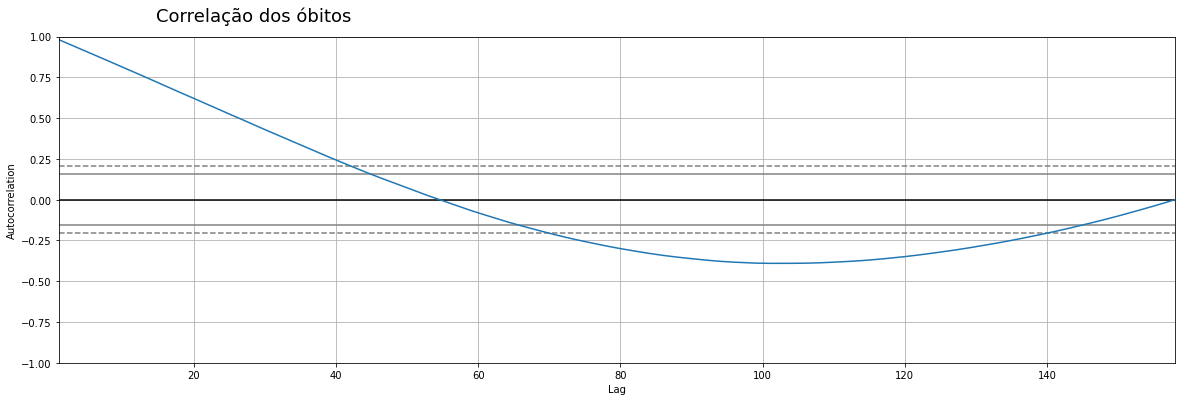

In [28]:
ax = plt.figure(figsize=(20,6))
ax.suptitle('Correlação dos óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp.Obitos)
ax = ax

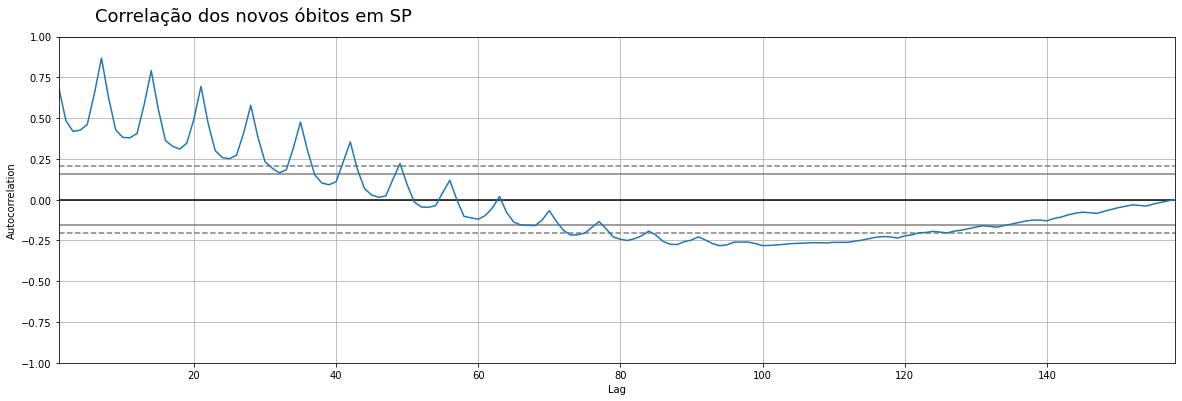

In [31]:
ax = plt.figure(figsize=(20,6))
ax.suptitle('Correlação dos novos óbitos em SP', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp.novosObitos)
ax = ax

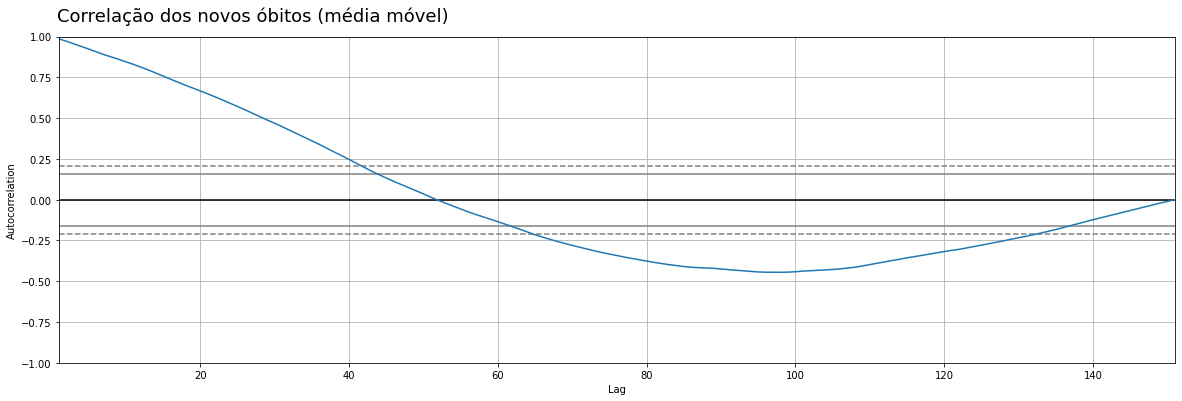

In [35]:
ax = plt.figure(figsize=(20,6))
ax.suptitle('Correlação dos novos óbitos (média móvel)', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp.mediaObitos[7:])
ax = ax

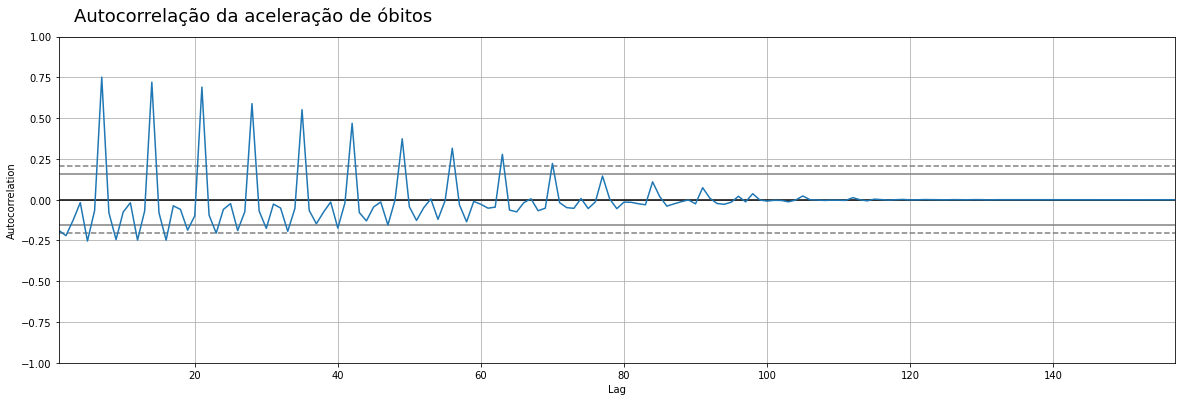

In [36]:
ax = plt.figure(figsize=(20,6))
ax.suptitle('Autocorrelação da aceleração de óbitos', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(df_sp.aceleracaoObitos[1:])
ax = ax

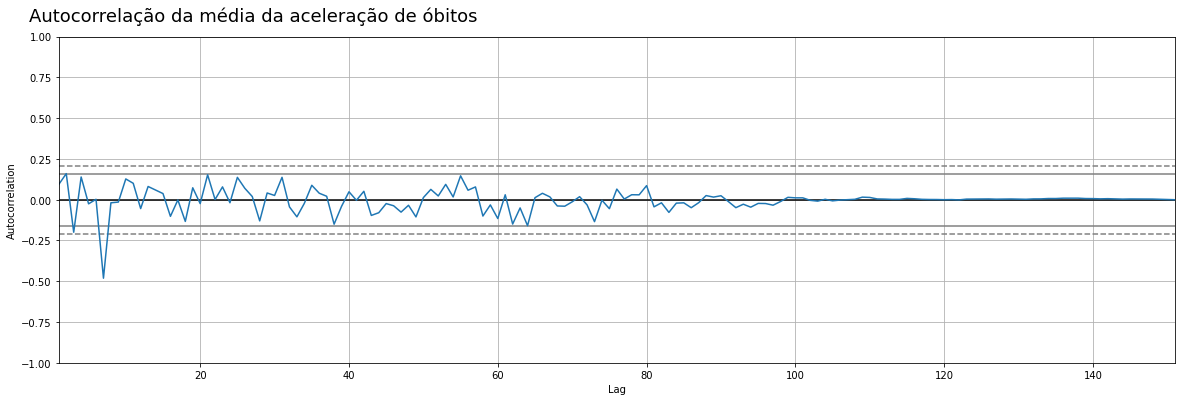

In [38]:
df_sp['mediaAccObitos'] = df_sp['aceleracaoObitos'][1:].rolling(window=7,center=False).mean()

ax = plt.figure(figsize=(20,6))
ax.suptitle('Autocorrelação da média da aceleração de óbitos',fontsize=18,x=0.26,y=0.95)
autocorrelation_plot(df_sp['mediaAccObitos'][7:])
ax=ax

In [45]:
df_sp['mes'] = pd.to_datetime(df_sp.data)
df_sp['dia_da_semana'] = df_sp.mes.dt.day_name()
dias_traduzidos = {'Monday':'Segunda',
                   'Tuesday':'Terça',
                   'Wednesday':'Quarta',
                   'Thursday':'Quinta',
                   'Friday':'Sexta',
                   'Saturday':'Sábado',
                   'Sunday':'Domingo'}
df_sp['dia_da_semana'] = df_sp.dia_da_semana.map(dias_traduzidos)
df_sp.head()

,semana,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k,aceleracaoCasos,aceleracaoObitos,aceleracaoRecuperados,mediaObitos,mediaObitos14,mediaAccObitos,mes,dia_da_semana
0,9,2020-02-25,Brazil,SP,TOTAL,0,0,1,1,0,0,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,Terça
2,9,2020-02-26,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,NaN,2020-02-26,Quarta
4,9,2020-02-27,Brazil,SP,TOTAL,0,0,0,1,0,1,0.0,0.00218,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2020-02-27,Quinta
6,9,2020-02-28,Brazil,SP,TOTAL,0,0,1,2,0,1,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,2020-02-28,Sexta
8,9,2020-02-29,Brazil,SP,TOTAL,0,0,0,2,0,2,0.0,0.00436,0.0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,NaN,NaN,NaN,2020-02-29,Sábado


In [53]:
agrupados_sp = df_sp.groupby('dia_da_semana')['Obitos', 'novosObitos', 'aceleracaoObitos'].mean().round()
agrupados_sp['dia_da_semana'] = agrupados_sp.index
agrupados_sp = agrupados_sp.reindex(['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado'])
agrupados_sp

,Obitos,novosObitos,aceleracaoObitos,dia_da_semana
dia_da_semana,,,,
Domingo,6846.0,60.0,-95.0,Domingo
Segunda,6887.0,41.0,-20.0,Segunda
Terça,6794.0,206.0,175.0,Terça
Quarta,6975.0,181.0,-25.0,Quarta
Quinta,7165.0,190.0,9.0,Quinta
Sexta,7342.0,177.0,-13.0,Sexta
Sábado,6786.0,155.0,-17.0,Sábado


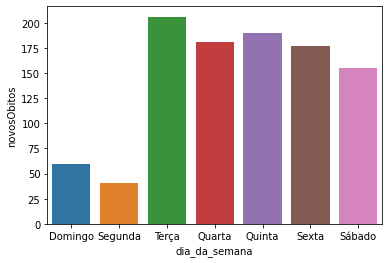

In [55]:
sns.barplot(agrupados_sp.dia_da_semana, agrupados_sp.novosObitos);

In [84]:
def criar_features(df, label=None):
    df = df.copy()
    df['diasemana'] = df.mes.dt.dayofweek
    df['mês'] = df.mes.dt.month
    df['diamês'] = df.mes.dt.day

    X = df[['diasemana', 'mês', 'diamês']]

    if label:
        y = df[label]
        return X,y
    return X

In [85]:
X, y = criar_features(df_sp, label='Obitos')

In [86]:
df_final = pd.concat([X,y], axis=1)

In [87]:
df_final.head(10)

,diasemana,mês,diamês,Obitos
0,1,2,25,0
2,2,2,26,0
4,3,2,27,0
6,4,2,28,0
8,5,2,29,0
10,6,3,1,0
12,0,3,2,0
14,1,3,3,0
16,2,3,4,0
19,3,3,5,0


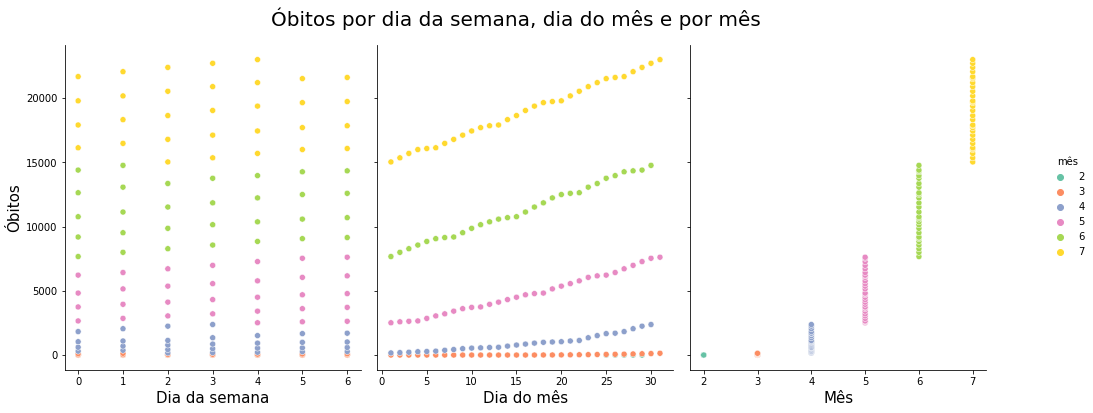

In [97]:
g = sns.pairplot(df_final.dropna(),
                 hue='mês',
                 x_vars=['diasemana', 'diamês', 'mês'],
                 y_vars='Obitos',
                 palette='Set2')

g.fig.set_size_inches(16,6)
g.axes[0,0].set_xlabel('Dia da semana', fontsize=15)
g.axes[0,1].set_xlabel('Dia do mês', fontsize=15)
g.axes[0,2].set_xlabel('Mês', fontsize=15)
g.axes[0,0].set_ylabel('Óbitos', fontsize=15)

plt.suptitle('Óbitos por dia da semana, dia do mês e por mês', fontsize=20, y=1.05);

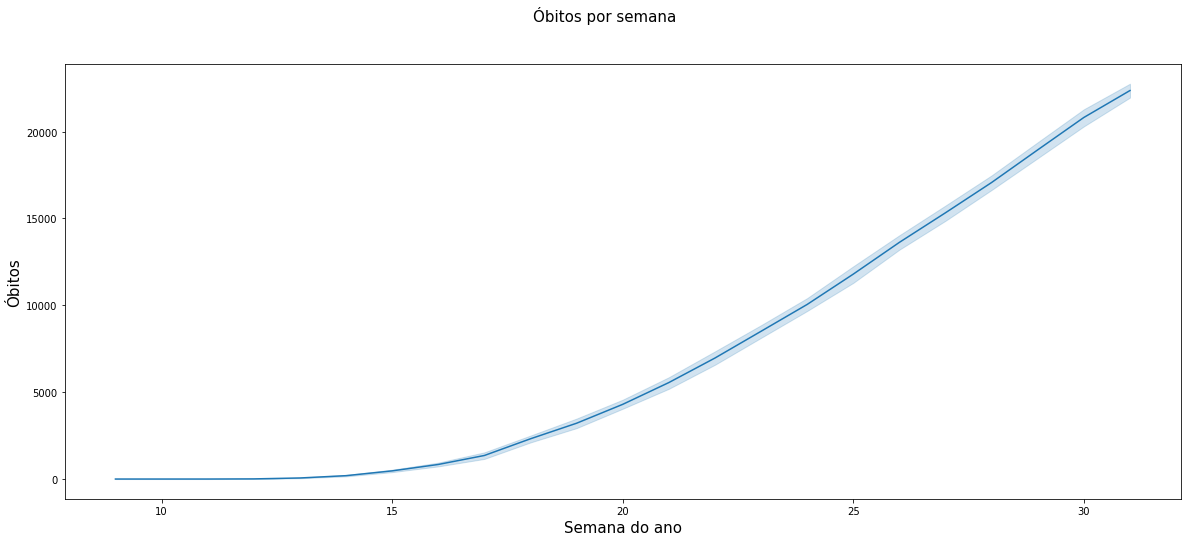

In [103]:
def criar_features(df,label=None):
    df = df.copy()
    df['diasemana'] = df['mes'].dt.dayofweek
    df['mês'] = df['mes'].dt.month
    df['diamês'] = df['mes'].dt.day
    df['semana'] = df['mes'].dt.weekofyear

    X = df[['diasemana','mês','diamês','semana']]

    if label:
        y = df[label]
        return X,y
    return X

X, y = criar_features(df_sp, label='Obitos')
df_final2 = pd.concat([X,y], axis=1)

plt.figure(figsize=(20,8))
g = sns.lineplot(x='semana',y='Obitos',data=df_final2)

g.axes.set_xlabel('Semana do ano',fontsize=15)
g.axes.set_ylabel('Óbitos',fontsize=15)

plt.suptitle('Óbitos por semana',fontsize=15);

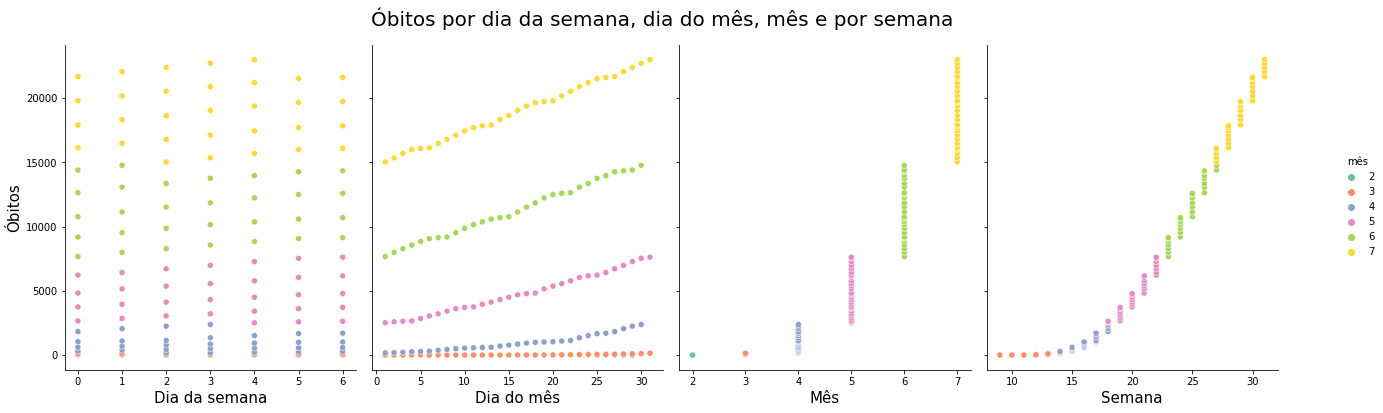

In [105]:
g = sns.pairplot(df_final2.dropna(),
                 hue='mês',
                 x_vars=['diasemana', 'diamês', 'mês', 'semana'],
                 y_vars='Obitos',
                 palette='Set2')

g.fig.set_size_inches(20,6)
g.axes[0,0].set_xlabel('Dia da semana', fontsize=15)
g.axes[0,1].set_xlabel('Dia do mês', fontsize=15)
g.axes[0,2].set_xlabel('Mês', fontsize=15)
g.axes[0,3].set_xlabel('Semana', fontsize=15)
g.axes[0,0].set_ylabel('Óbitos', fontsize=15)

plt.suptitle('Óbitos por dia da semana, dia do mês, mês e por semana', fontsize=20, y=1.05);